In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def createTiles(x=1,y=2,hwidth=8,vwidth=4): 
    fig,plots = plt.subplots(x,y,figsize=(hwidth,vwidth));
    plots = plots.flatten()
    return(fig, plots)

def numpy_ewma_vectorized_v2(data, window=20):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha
    n = data.shape[0]

    pows = alpha_rev**(np.arange(n+1))

    scale_arr = 1/pows[:-1]
    offset = data[0]*pows[1:]
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

def plot_logs(train_logs, time=True, y_min = -1500, y_max = 0):
    fig, plots = createTiles(1,2,15,5)

    avg_reward = numpy_ewma_vectorized_v2(np.array(train_logs['total_reward']))
    plots[0].plot(train_logs['time'],avg_reward , label = train_logs['info_summary'])
    plots[0].set_xlabel('time(in minutes)')
    plots[0].set_ylabel('avg_reward')
    plots[0].set_title('Avg reward vs Time')
    plots[0].legend()
    plots[0].set_ylim(y_min, y_max)

             
    plots[1].plot(avg_reward, label = train_logs['info_summary'])
    plots[1].set_xlabel(train_logs['x'])
    plots[1].set_ylabel('avg_reward')
    plots[1].set_title('Avg reward vs ' + train_logs['x'])
    plots[1].legend()
    plots[1].set_ylim(y_min, y_max)
    
    plt.show()         
             

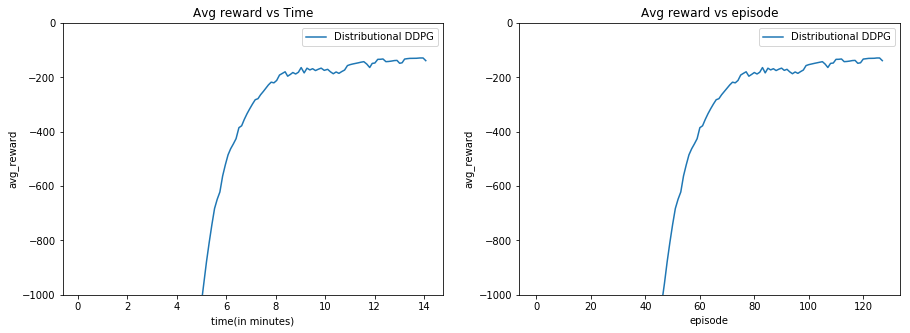

In [67]:
with open('train_Pendulum-v0_logs_20180608-203928.pkl', 'rb') as fHandle:
    train_logs = pickle.load(fHandle)
plot_logs(train_logs, y_min = -1000, y_max = 0)

In [73]:
! pwd

/home/aditya/ADITYA/Project/d4pg-pytorch


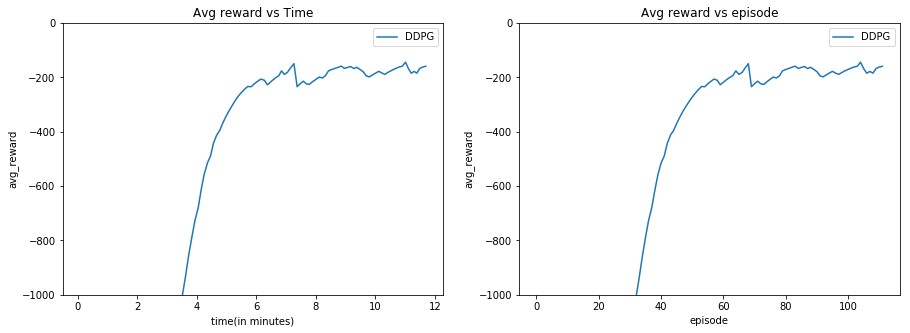

In [70]:
filepath = '/home/aditya/ADITYA/Project/d3pg-pytorch/train_logs_Pendulum-v0_latest.pkl'
with open(filepath, 'rb') as fHandle:
    train_logs = pickle.load(fHandle)
plot_logs(train_logs, y_min = -1000, y_max = 0)